In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

In [2]:
df = pd.read_csv("./adult_clean.csv")
df = df.drop(columns=['marital_status'])
very_src = df.copy()
means = df.mean(axis=0)
df = df > means

print(*df.columns)
print(df.shape)
# print(means)
display(df[['income', 'Sex']].groupby(['Sex']).agg('sum'))

src = df.copy()

age workclass education hours_per_week income Sex
(32561, 6)


,income
Sex,
False,1179
True,6662


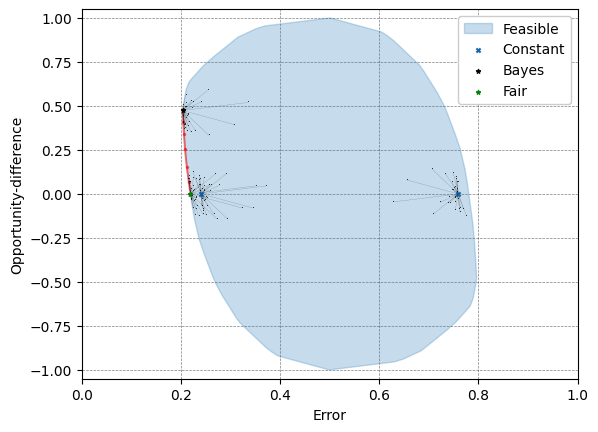

max: 0.39593908629441626 0.742520398912058
mean: 0.17800889012520735 0.3811997188018896
ineq: 0.24901324732479962 < 0.09356877557863462


income    weight
workclass hours_per_week age   education Sex                      
False     False          False False     False  0.026367  0.109487
True      True           False False     False  0.050847  0.001812
False     True           False False     False  0.060209  0.011732
True      False          False False     False  0.066514  0.013390
False     False          True  False     False  0.081107  0.063235
          True           True  False     False  0.110465  0.010565
True      True           True  False     False  0.122449  0.003010
False     False          False True      False  0.122633  0.034059
True      False          True  False     False  0.139373  0.017628
                         False True      False  0.160131  0.009398
False     False          True  True      False  0.233108  0.018181
True      True           False True      False  0.295652  0.003532
          False          True  True      False  0.298969  0.011916
False     True           False True      False  0.299401  0.010258
                         True  True      False  0.384977  0.006542
True      True           True  True      False  0.395939  0.006050
False     False          False False     True   0.062167  0.149688
True      False          False False     True   0.131677  0.024723
False     True           False False     True   0.174986  0.055987
          False          True  False     True   0.240635  0.096742
                         False True      True   0.253242  0.040263
True      False          True  False     True   0.281199  0.037898
                         False True      True   0.281690  0.013083
          True           False False     True   0.289796  0.015049
                         True  False     True   0.376289  0.023832
False     True           True  False     True   0.430959  0.042259
True      True           False True      True   0.458234  0.012868
False     True           False True      True   0.531309  0.032370
          False          True  True      True   0.547468  0.038819
True      False          True  True      True   0.583991  0.027241
          True           True  True      True   0.713033  0.024508
False     True           True  True      True   0.742520  0.033875

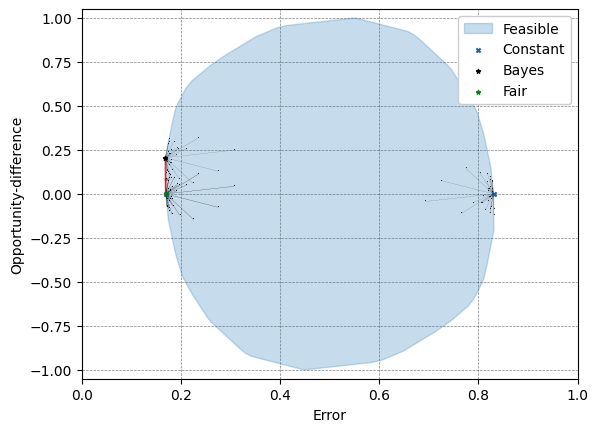

max: 0.29949238578680204 0.5087719298245614
mean: 0.12663137912583944 0.2686354621300423
ineq: 0.009263291797587683 < 0.16955727035493756


income    weight
workclass hours_per_week age   education Sex                      
False     False          False False     False  0.017952  0.109487
True      True           False False     False  0.033898  0.001812
False     True           False False     False  0.034031  0.011732
True      False          False False     False  0.052752  0.013390
False     False          True  False     False  0.059252  0.063235
          True           True  False     False  0.072674  0.010565
          False          False True      False  0.091073  0.034059
True      True           True  False     False  0.091837  0.003010
          False          True  False     False  0.101045  0.017628
                         False True      False  0.114379  0.009398
False     False          True  True      False  0.163851  0.018181
True      True           False True      False  0.191304  0.003532
False     True           False True      False  0.200599  0.010258
True      False          True  True      False  0.206186  0.011916
False     True           True  True      False  0.295775  0.006542
True      True           True  True      False  0.299492  0.006050
False     False          False False     True   0.041239  0.149688
True      False          False False     True   0.081988  0.024723
False     True           False False     True   0.127811  0.055987
          False          True  False     True   0.164762  0.096742
                         False True      True   0.180778  0.040263
True      True           False False     True   0.193878  0.015049
          False          True  False     True   0.203404  0.037898
                         False True      True   0.206573  0.013083
          True           True  False     True   0.248711  0.023832
False     True           True  False     True   0.305233  0.042259
True      True           False True      True   0.334129  0.012868
False     True           False True      True   0.389943  0.032370
True      False          True  True      True   0.402480  0.027241
False     False          True  True      True   0.403481  0.038819
          True           True  True      True   0.504986  0.033875
True      True           True  True      True   0.508772  0.024508

In [3]:
from equal_opportunity import DataSource


def simplify_dataset(df, info=True):
    columns_X = [*(set(df.columns)-set(['income', 'Sex']))]
    columns_XA = [*columns_X, 'Sex']
    test = df.groupby(columns_XA).agg({'income':'mean', 'Sex':'count'}).rename(columns={'Sex':'weight'})
    test['weight'] /= len(df)
    test = test.sort_values(["Sex", "income"])
    maxFalse, maxTrue = test.groupby(['Sex']).agg({'income': 'max'}).values.ravel()
    meanFalse, meanTrue = test.groupby(['Sex']).agg({'income': 'mean'}).values.ravel()
    if info:
        print('max:', maxFalse, maxTrue)
        print('mean:', meanFalse, meanTrue)
        print('ineq:', meanTrue * (2-1/maxTrue), '<', meanFalse * (1/maxFalse-2))
    return test


def asDataSource(data):
    df = simplify_dataset(data, info=False).reset_index()
    pFalse = df.loc[df['Sex']==0, 'weight']
    qFalse = df.loc[df['Sex']==0, 'income']
    pTrue = df.loc[df['Sex']==1, 'weight']
    qTrue = df.loc[df['Sex']==1, 'income']
    n = max(len(qFalse), len(qTrue))
    whatever = 0.5
    P = np.zeros(2*n)
    Q = np.ones(2*n) * whatever
    P[:len(pFalse)] = pFalse
    Q[:len(qFalse)] = qFalse
    P[n:n+len(pTrue)] = pTrue
    Q[n:n+len(qTrue)] = qTrue
    return DataSource(P, Q)

df = src.copy()
asDataSource(df).the_plot(r=0, constants=True, constant_movements=True)
display(simplify_dataset(df))

df['income'] = df['income'].apply(lambda x: 0 if not x else np.random.random()<0.7).astype(float)
asDataSource(df).the_plot(r=0, constants=True, constant_movements=True)
display(simplify_dataset(df))

postProcessed = df.astype(float)


max: 1.0 1.0
mean: 0.17758398962179198 0.3124910144596918
ineq: 0.3124910144596918 < -0.17758398962179198


income    weight
workclass hours_per_week age education Sex                  
0         0              0   0         0       0.0  0.005559
                             1         0       0.0  0.004085
                             2         0       0.0  0.008968
                             3         0       0.0  0.000092
                             4         0       0.0  0.000737
...                                            ...       ...
2         5              6   3         1       1.0  0.000031
                         7   2         1       1.0  0.000092
                         8   3         1       1.0  0.000031
                         9   3         1       1.0  0.000031
                             5         1       1.0  0.000154

[1739 rows x 2 columns]

/home/carlos/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


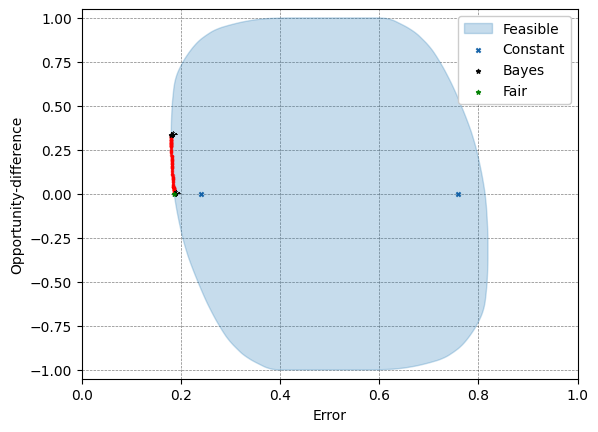

In [4]:
df = very_src.copy()
for col in set(df.columns)-set(['income', 'Sex']):
    df[col] = pd.qcut(df[col], 10, labels=False, duplicates='drop')
display(simplify_dataset(df))


asDataSource(df).the_plot(r=0, constants=True)


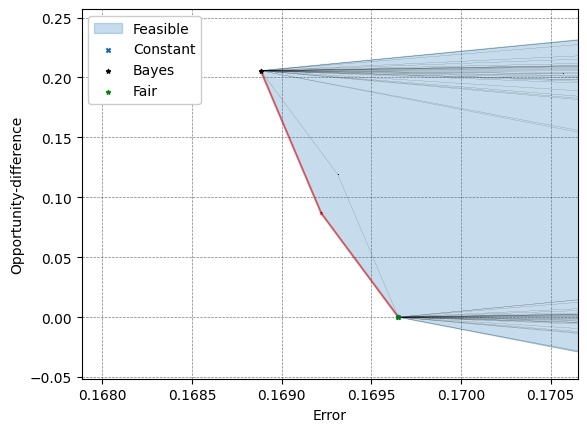

,age,workclass,education,hours_per_week,income,Sex
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,1.0,0.0,0.0,0.0
32558,1.0,0.0,0.0,0.0,1.0,1.0
32559,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = postProcessed.copy()
asDataSource(df).the_plot(r=0.25, constants=True)
display(df)

In [6]:
from sklearn.model_selection import train_test_split

data = postProcessed.copy()

allXA = data.drop(columns=['income']).values.copy()
allA = data['Sex'].values.copy()
allY = data['income'].values.copy()

trainXA, testXA, trainA, testA, trainY, testY, trainData, testData = train_test_split(allXA, allA, allY, data, test_size=0.30)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(trainXA, trainY)

RandomForestClassifier()

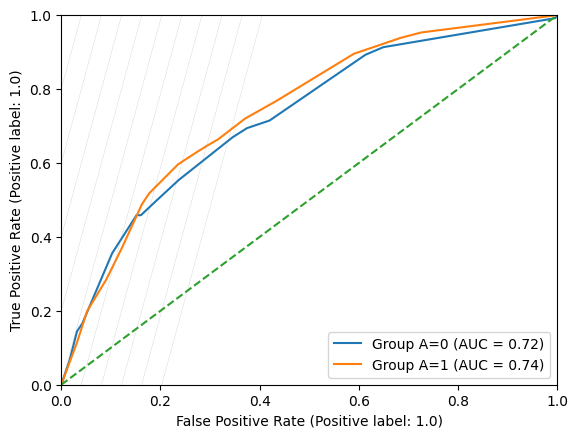

In [7]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

ax = plt.gca()
RocCurveDisplay.from_estimator(clf, testXA[testA==0], testY[testA==0], ax=ax, name='Group A=0')
RocCurveDisplay.from_estimator(clf, testXA[testA==1], testY[testA==1], ax=ax, name='Group A=1')
#RocCurveDisplay.from_estimator(clf, testXA, testY, ax=ax)
plt.plot([0,1], [0,1], linestyle='--')

pPos, pNeg = np.mean(testY), 1-np.mean(testY)
for i in range(-5,5):
    dy = i/5
    plt.plot([0, 1], [dy, dy+pNeg/pPos], color='gray', linewidth=0.1)

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()


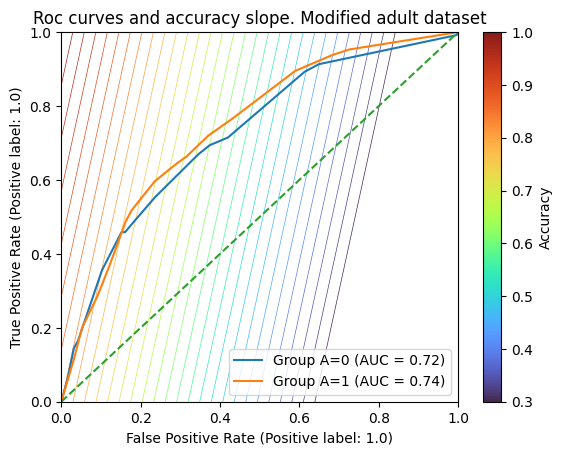

In [8]:
from plot_utils import multiline

fig, ax = plt.subplots()
pPos, pNeg = np.mean(testY), 1-np.mean(testY)

acc_levels = np.linspace(0.3, 1.0, 30)
xs = np.array([[0,1] for _ in acc_levels])
ys = np.array([[(c-pNeg)/pPos, c/pPos] for c in acc_levels])
lc = multiline(xs, ys, acc_levels, cmap='turbo', lw=0.5, ax=ax, alpha=0.9)
axcb = fig.colorbar(lc)
axcb.set_label('Accuracy')

RocCurveDisplay.from_estimator(clf, testXA[testA==0], testY[testA==0], ax=ax, name='Group A=0')
RocCurveDisplay.from_estimator(clf, testXA[testA==1], testY[testA==1], ax=ax, name='Group A=1')
#RocCurveDisplay.from_estimator(clf, testXA, testY, ax=ax)
plt.plot([0,1], [0,1], linestyle='--')

ax.set_title('Roc curves and accuracy slope. Modified adult dataset')
plt.ylim([0,1])
plt.xlim([0,1])

plt.show()


0.8315078308936432
0.8330433002354386


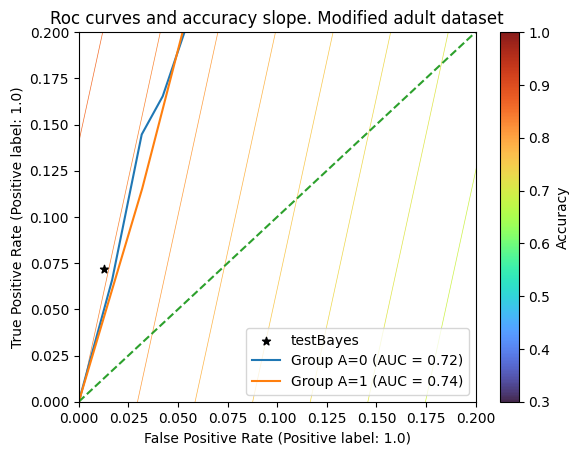

In [9]:
from plot_utils import multiline

fig, ax = plt.subplots()
pPos, pNeg = np.mean(testY), 1-np.mean(testY)

acc_levels = np.linspace(0.3, 1.0, 30)
xs = np.array([[0,1] for _ in acc_levels])
ys = np.array([[(c-pNeg)/pPos, c/pPos] for c in acc_levels])
lc = multiline(xs, ys, acc_levels, cmap='turbo', lw=0.5, ax=ax, alpha=0.9)
axcb = fig.colorbar(lc)
axcb.set_label('Accuracy')

df = simplify_dataset(testData, info=False)
df['pred'] = (df['income']>=0.5).astype(float)
predsDict = {key:row['pred'] for key, row in df.iterrows()}
testPreds = np.array([predsDict[tuple(key)] for key in testXA])
TPR = testPreds[testY==1].mean()
FPR = testPreds[testY==0].mean()
plt.scatter([FPR], [TPR], marker='*', color='black', label='testBayes')
accConstant = 1-np.mean(testY)
accBayes = 1-np.mean(np.abs(testY-testPreds))
print(accConstant)
print(accBayes)
#print(pPos*TPR + pNeg*(1-FPR))

RocCurveDisplay.from_estimator(clf, testXA[testA==0], testY[testA==0], ax=ax, name='Group A=0')
RocCurveDisplay.from_estimator(clf, testXA[testA==1], testY[testA==1], ax=ax, name='Group A=1')
#RocCurveDisplay.from_estimator(clf, testXA, testY, ax=ax)
plt.plot([0,1], [0,1], linestyle='--')

ax.set_title('Roc curves and accuracy slope. Modified adult dataset')
plt.ylim([0,0.2])
plt.xlim([0,0.2])

plt.show()
